In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import average_precision_score

from itertools import cycle
from sklearn.preprocessing import label_binarize

In [3]:
df_train = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\New Strat\\new_train_data.csv')
df_test = pd.read_csv('C:\\Users\\Zulu\\Desktop\\Thesis 1\\CSVs\\New Strat\\new_test_data.csv')
df_train['sum_raw_numeric'] = df_train['sum_raw_categorical'].astype('category')
df_train['sum_raw_numeric'] = df_train['sum_raw_numeric'].cat.codes
df_test['sum_raw_numeric'] = df_test['sum_raw_categorical'].astype('category')
df_test['sum_raw_numeric'] = df_test['sum_raw_numeric'].cat.codes
df_train

,school_category_numerical,school_type_numerical,district,track_numerical,strand_numerical,english_number,english_average,math_number,math_average,science_number,science_average,sum_ems,ems_average_number,ems_average,sum_raw_categorical,Selected,sum_raw_numeric
0,2,3,1,1,2,3,93,1,93,7,91,11,3,92,ABOVE AVERAGE,No,0
1,2,2,1,2,0,2,86,1,89,5,87,8,2,87,BELOW AVERAGE,No,2
2,1,3,1,1,2,5,92,1,93,5,91,11,3,92,ABOVE AVERAGE,No,0
3,1,3,2,1,4,5,92,2,93,3,94,10,3,93,AVERAGE,No,1
4,1,3,1,1,4,6,93,2,92,3,92,11,3,92,AVERAGE,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0,0,0,2,5,3,86,1,88,4,88,8,2,87,BELOW AVERAGE,No,2
213,1,3,0,1,1,4,93,2,93,2,94,8,2,93,BELOW AVERAGE,No,2
214,2,3,1,1,2,3,91,1,90,7,90,11,3,90,ABOVE AVERAGE,No,0
215,1,3,2,1,3,5,88,1,90,3,91,9,3,89,BELOW AVERAGE,No,2


In [19]:
x_train = df_train.drop(columns={"track_numerical","district","sum_raw_categorical","Selected","sum_raw_numeric"}, axis=1)
y_train = df_train['sum_raw_categorical']
y_train_numeric = df_train['sum_raw_numeric']
x_test = df_test.drop(columns={"track_numerical","district","sum_raw_categorical","Selected","sum_raw_numeric"}, axis=1)
y_test = df_test['sum_raw_categorical']
y_test_numeric = df_test['sum_raw_numeric']
y_test_numeric

0     0
1     0
2     1
3     2
4     2
     ..
87    2
88    1
89    1
90    1
91    2
Name: sum_raw_numeric, Length: 92, dtype: int8

Model Score:  0.7391304347826086
R2 Score:  0.6136482939632546
Mean Squared Error:  0.2608695652173913
Root Mean Squared Error:  0.5107539184552492


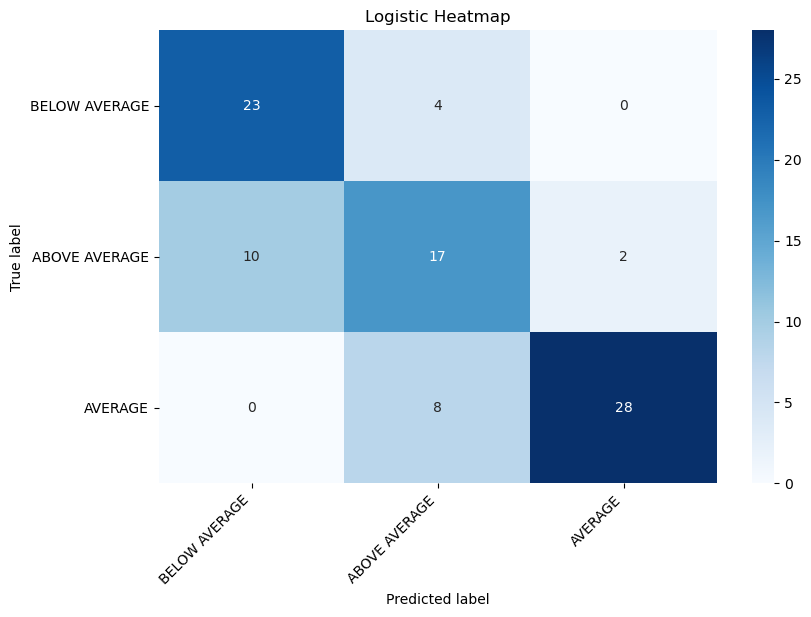

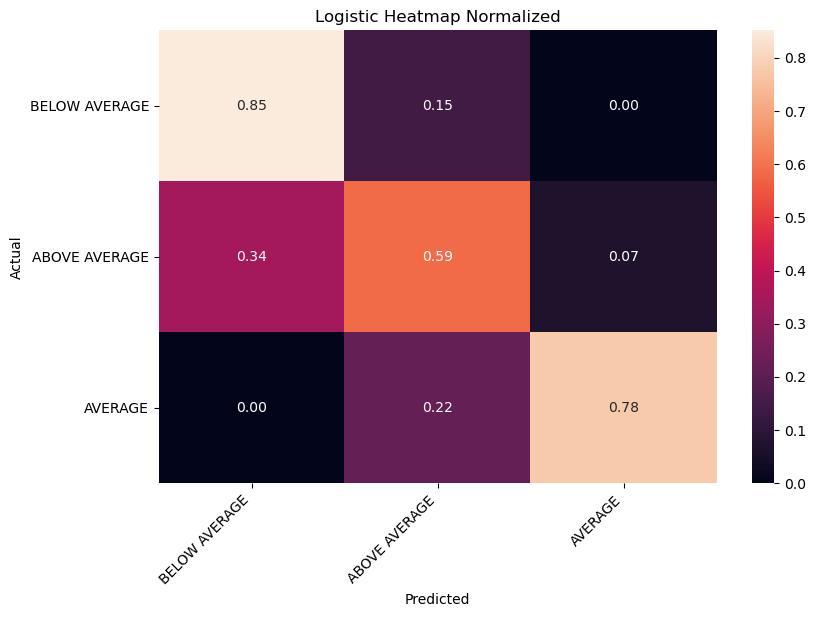

array([0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 0, 2], dtype=int8)

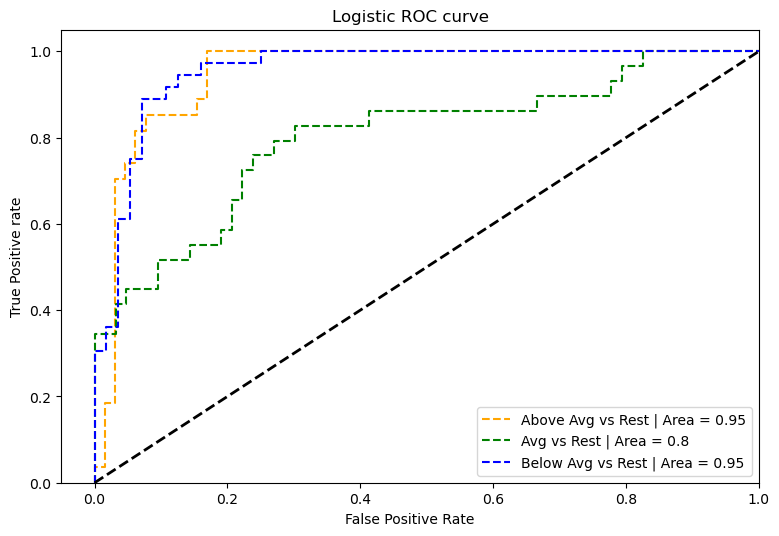

In [20]:
linearModel = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
linearModel.fit(x_train, y_train_numeric)
linearPredictions = linearModel.predict(x_test)
residuals = y_test_numeric - linearPredictions

Model_score = linearModel.score(x_test,y_test_numeric)
R2_score = r2_score(y_test_numeric,linearPredictions) #Same as Model_Score
Mean_sqrd_err = mean_squared_error(y_test_numeric,linearPredictions)
Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test_numeric,linearPredictions))
print('Model Score: ', Model_score)
print('R2 Score: ', R2_score)
print('Mean Squared Error: ', Mean_sqrd_err)
print('Root Mean Squared Error: ', Root_mn_sqrd_err)

conmat = confusion_matrix(y_test_numeric, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Logistic ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()
linearPredictions

Model Score:  0.7934782608695652


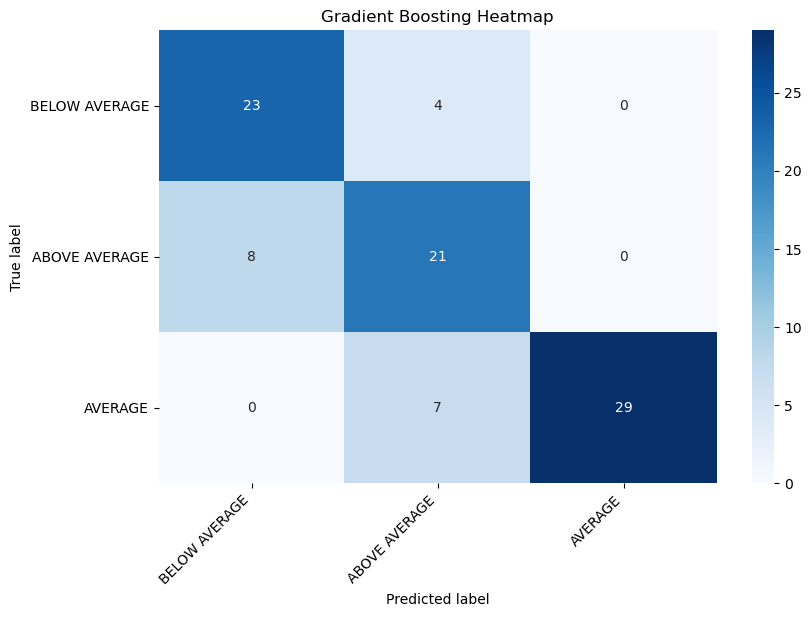

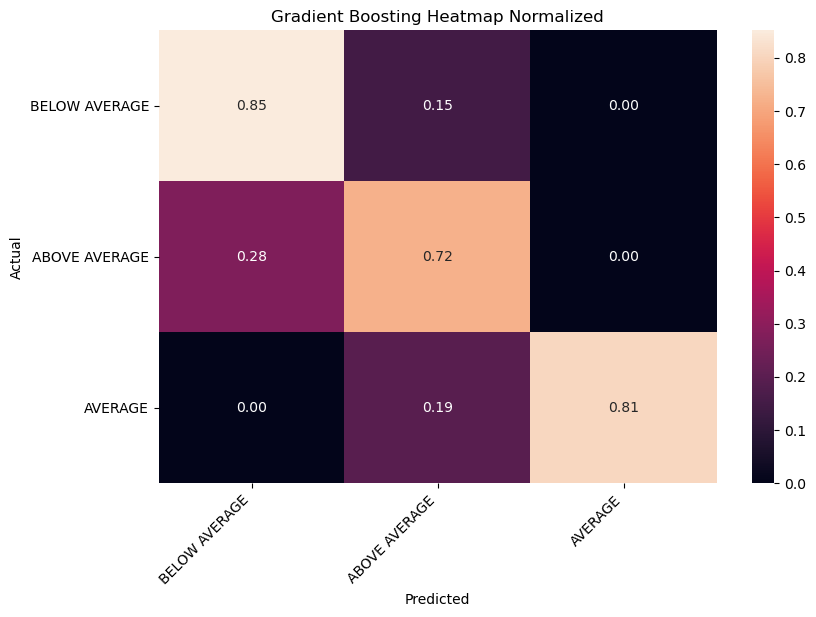

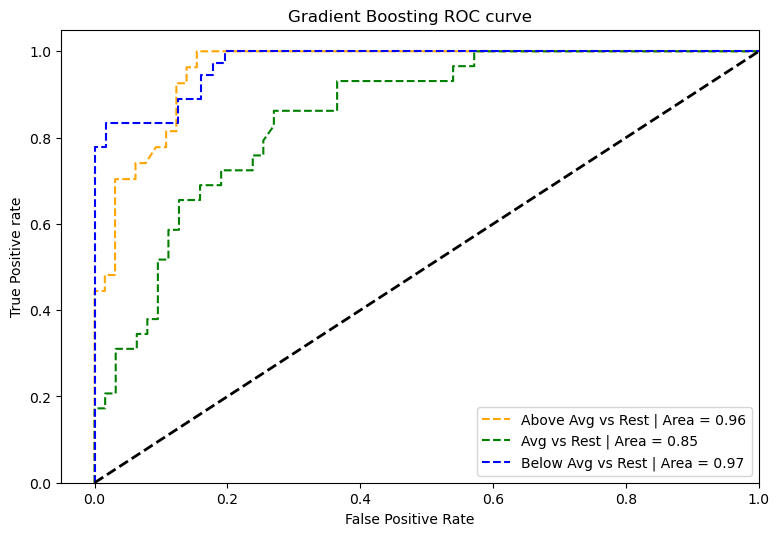

In [21]:
linearModel = GradientBoostingClassifier()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)
#residuals = y_test - linearPredictions

Model_score = linearModel.score(x_test,y_test)
# R2_score = r2_score(y_test,linearPredictions) #Same as Model_Score
# Mean_sqrd_err = mean_squared_error(y_test,linearPredictions)
# Root_mn_sqrd_err = np.sqrt(mean_squared_error(y_test,linearPredictions))
print('Model Score: ', Model_score)
# print('R2 Score: ', R2_score)
# print('Mean Squared Error: ', Mean_sqrd_err)
# print('Root Mean Squared Error: ', Root_mn_sqrd_err)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Gradient Boosting Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gradient Boosting Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(GradientBoostingClassifier())
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Gradient Boosting ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.75


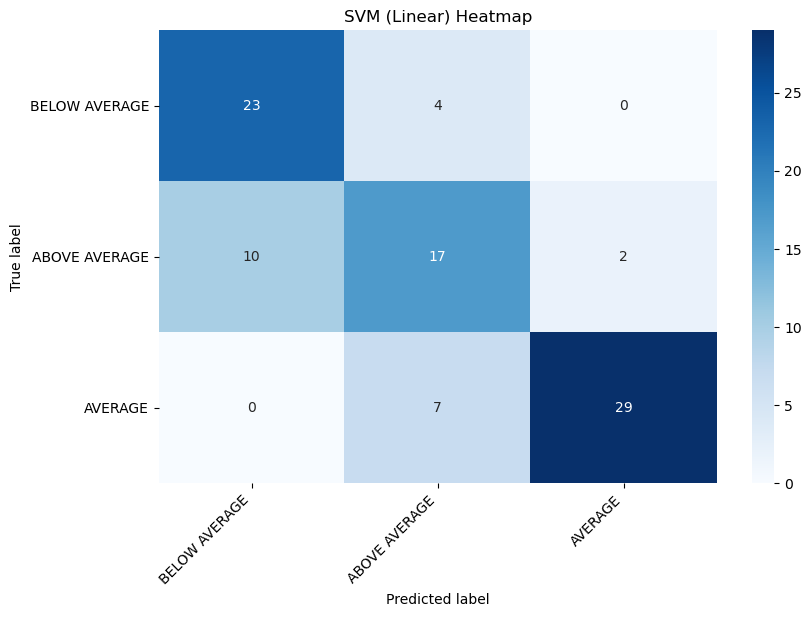

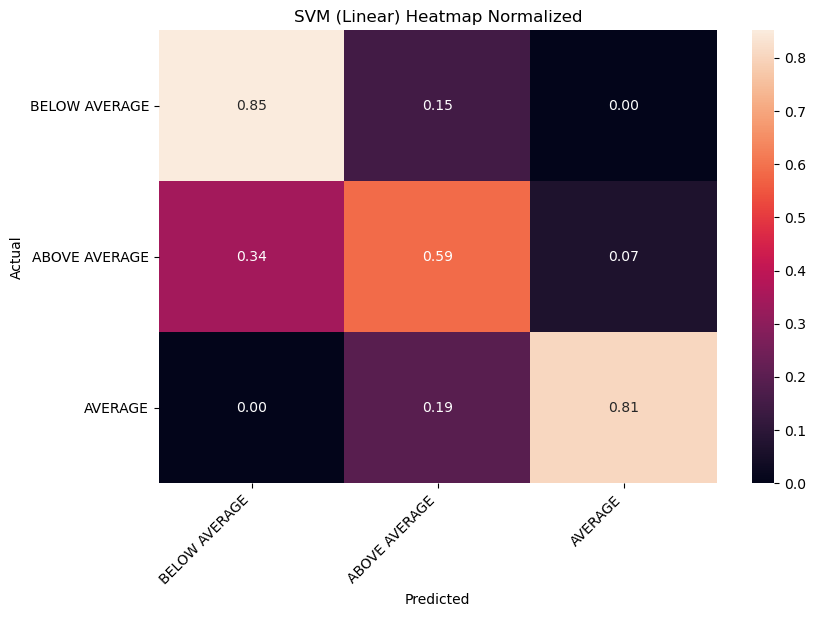

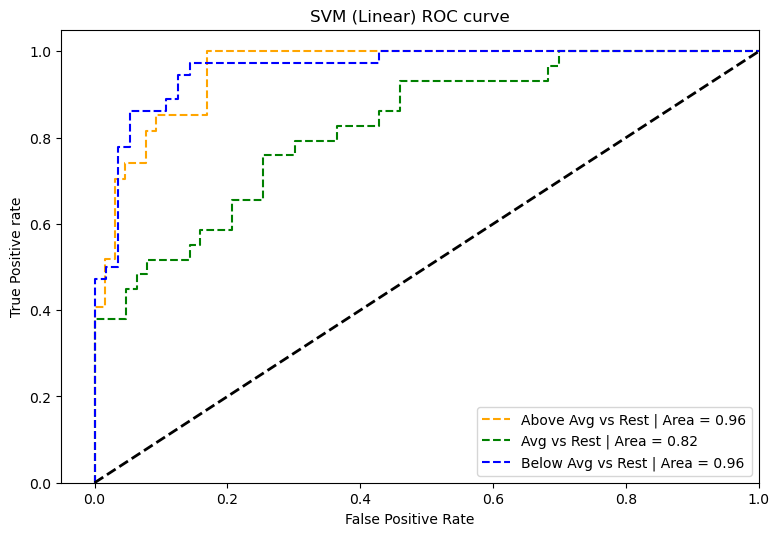

In [7]:
sv_model = SVC(kernel="linear",probability=True)
sv_model.fit(x_train, y_train)
sv_predictions = sv_model.predict(x_test)

sc_score = sv_model.score(x_test,y_test)
print('Model Score: ', sc_score)

conmat = confusion_matrix(y_test, sv_predictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SVM (Linear) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM (Linear) Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(sv_model)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('SVM (Linear) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.782608695652174


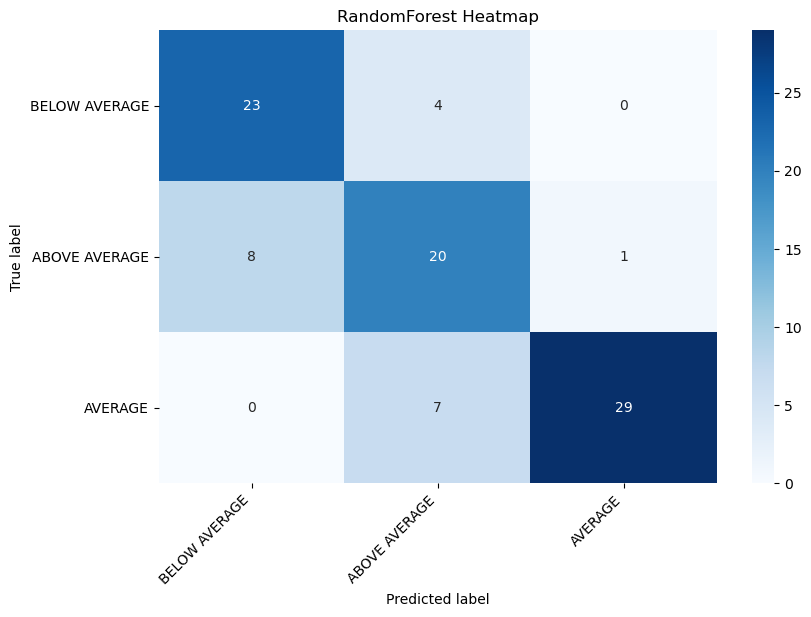

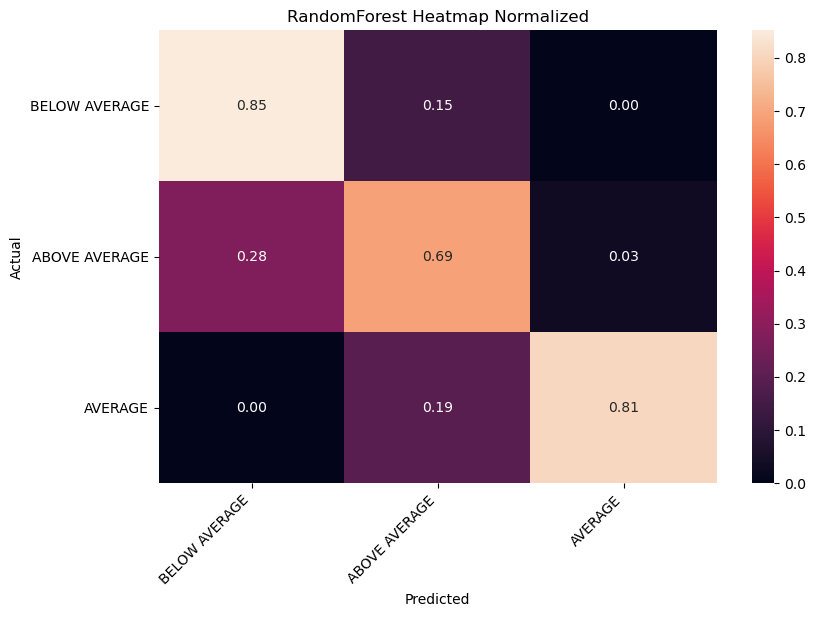

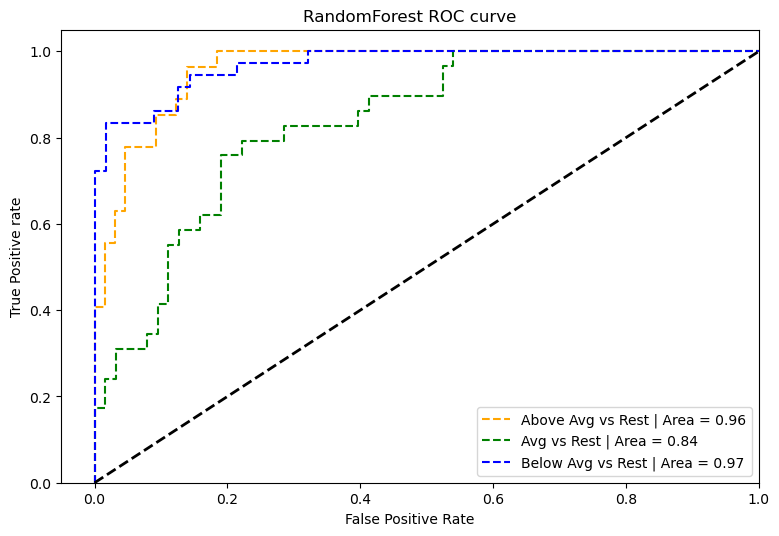

In [17]:
linearModel = RandomForestClassifier()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
print('Model Score: ', Model_score)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('RandomForest Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RandomForest Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('RandomForest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.6956521739130435


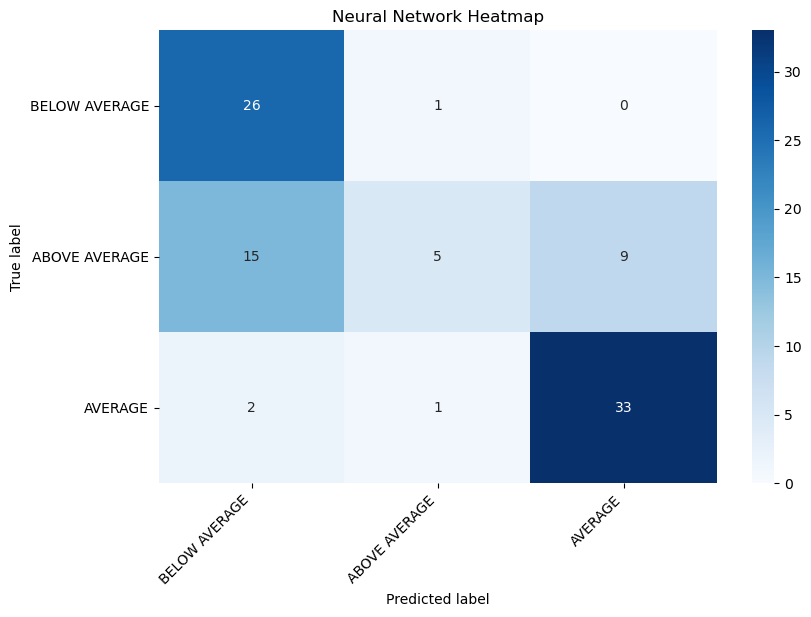

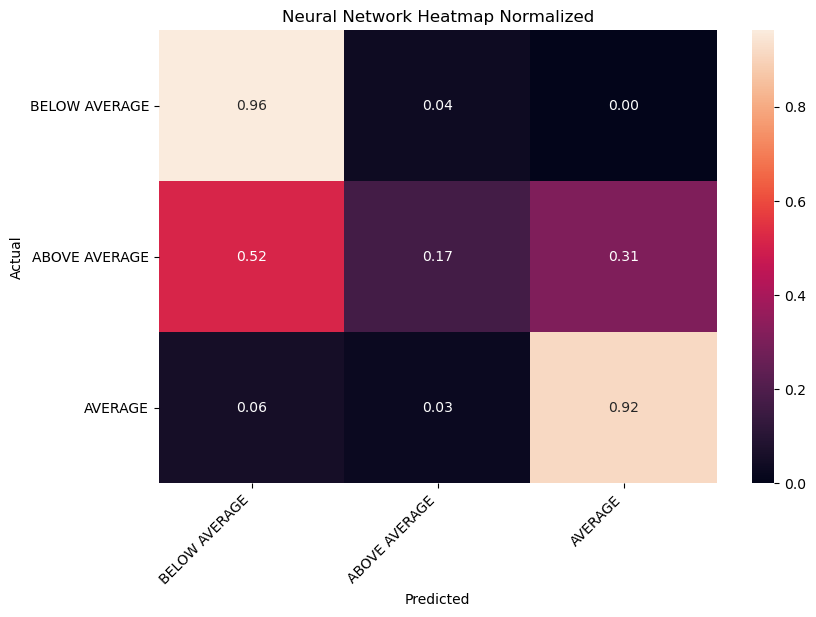

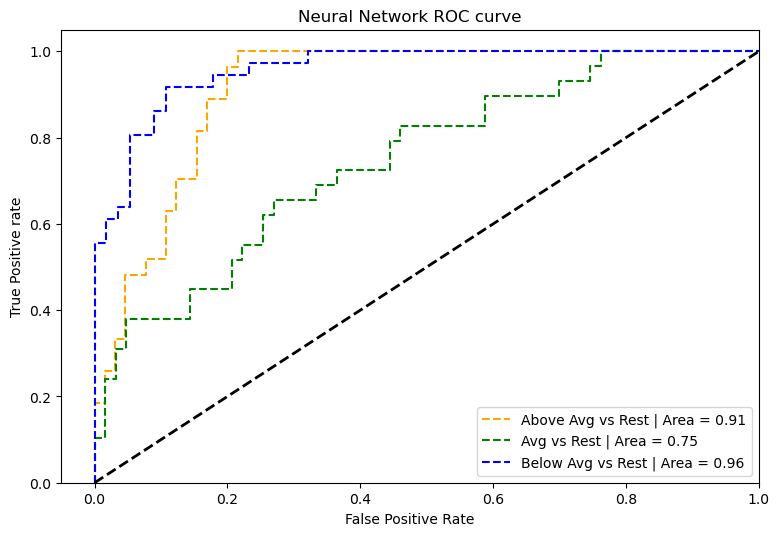

In [9]:
#Neural Network
linearModel = MLPClassifier(max_iter=500)
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
print('Model Score: ', Model_score)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Neural Network Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Neural Network Heatmap Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Neural Network ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.6195652173913043


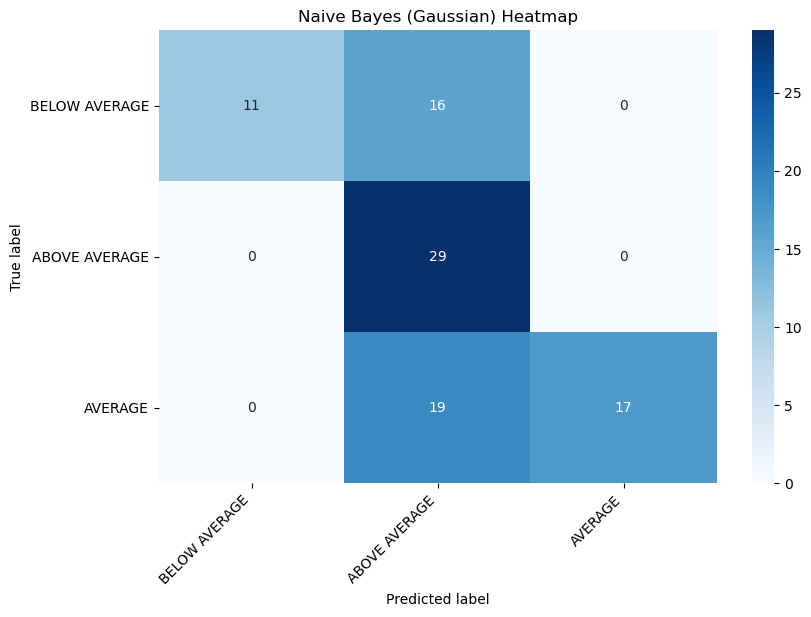

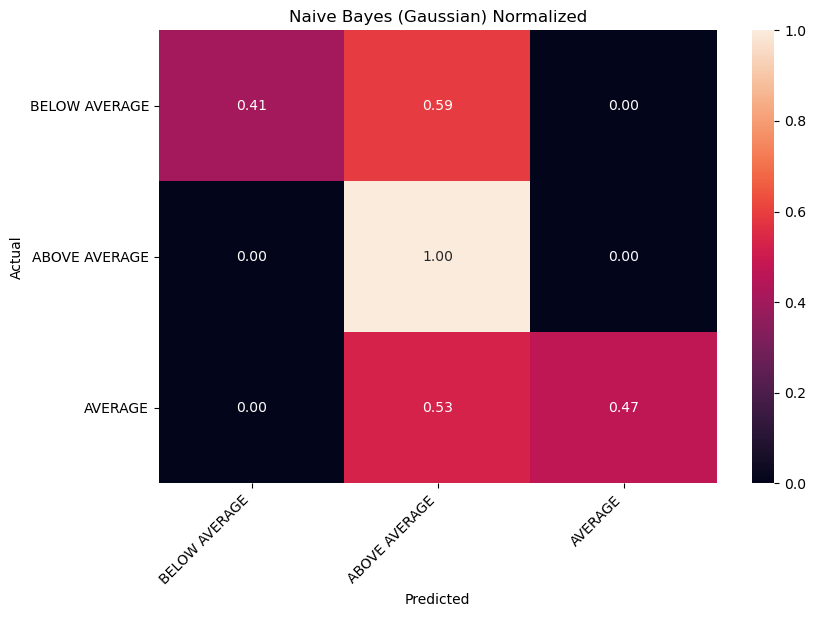

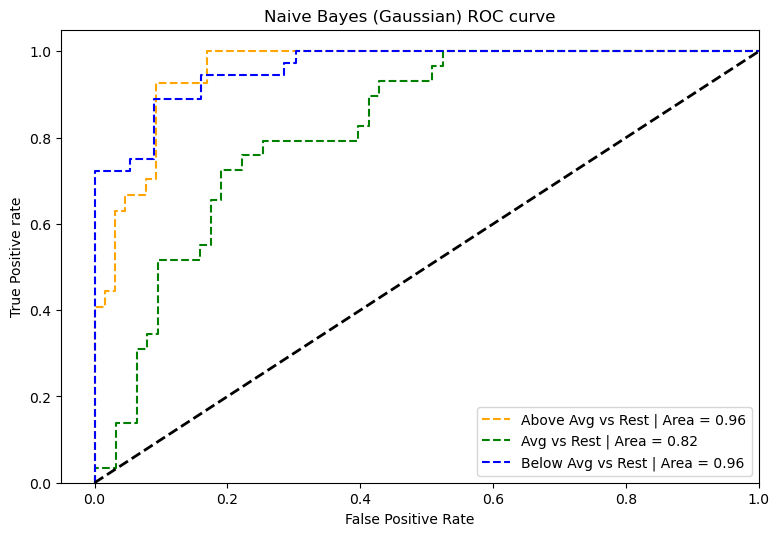

In [10]:
linearModel = GaussianNB()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
print('Model Score: ', Model_score)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes (Gaussian) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes (Gaussian) Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Naive Bayes (Gaussian) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.6956521739130435


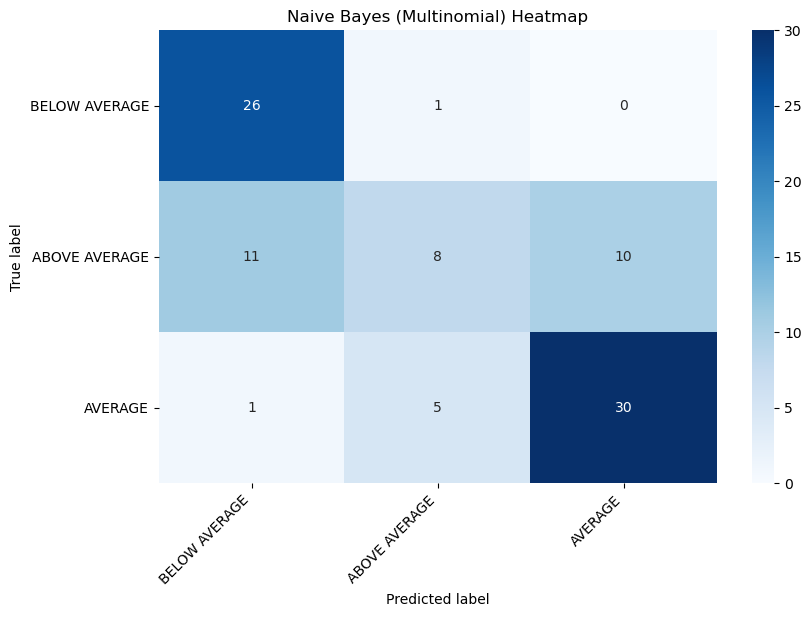

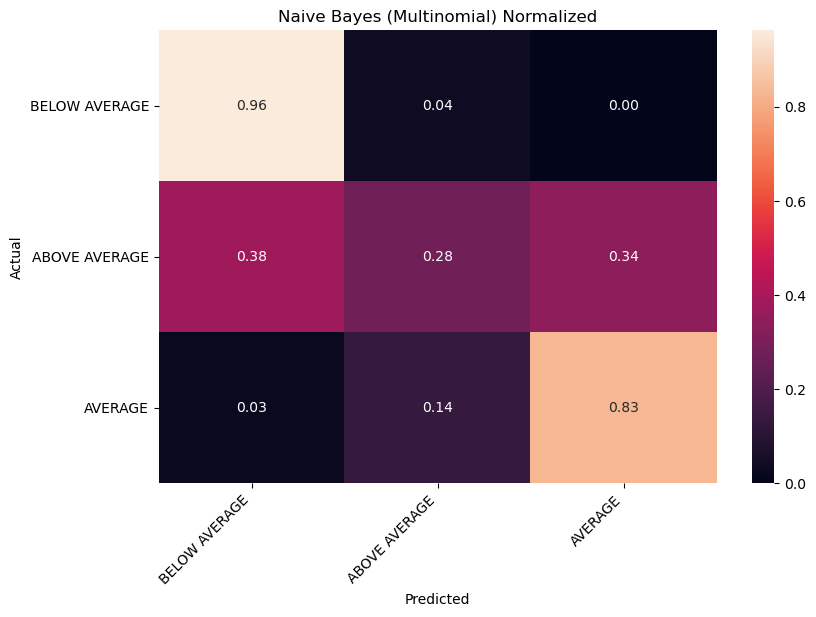

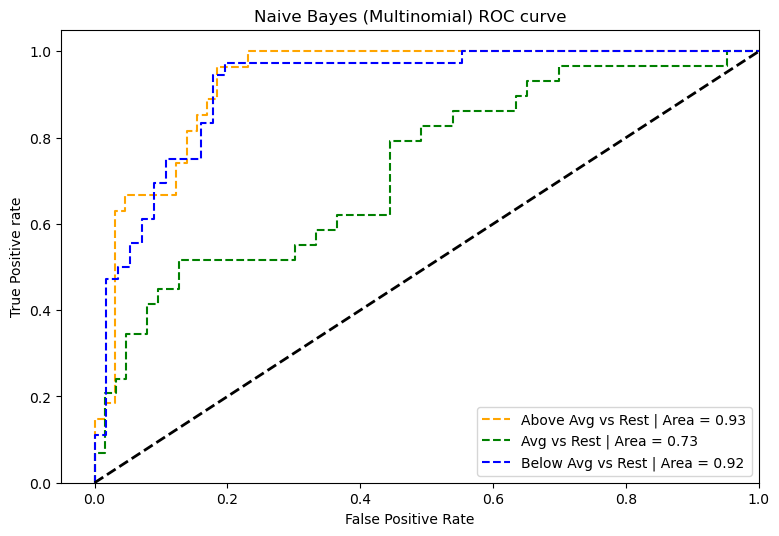

In [11]:
linearModel = MultinomialNB()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
print('Model Score: ', Model_score)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes (Multinomial) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes (Multinomial) Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Naive Bayes (Multinomial) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.6739130434782609


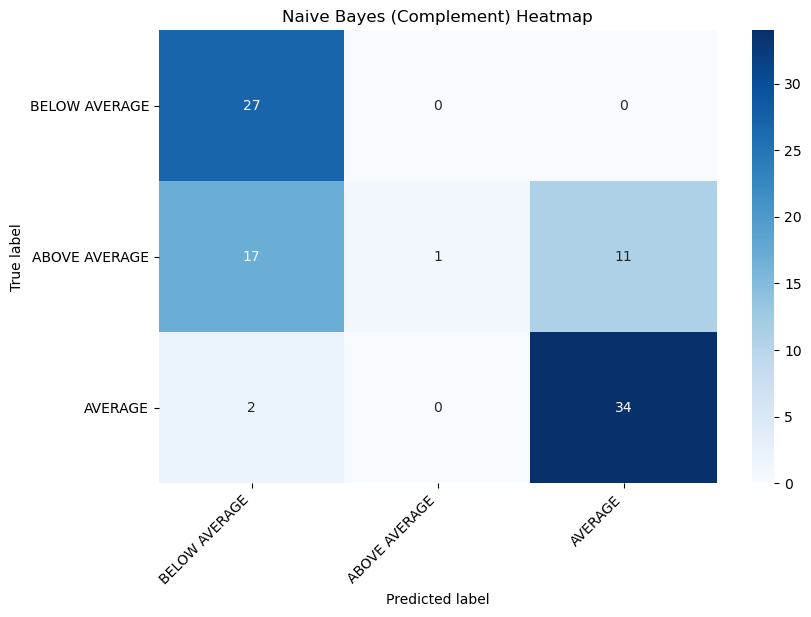

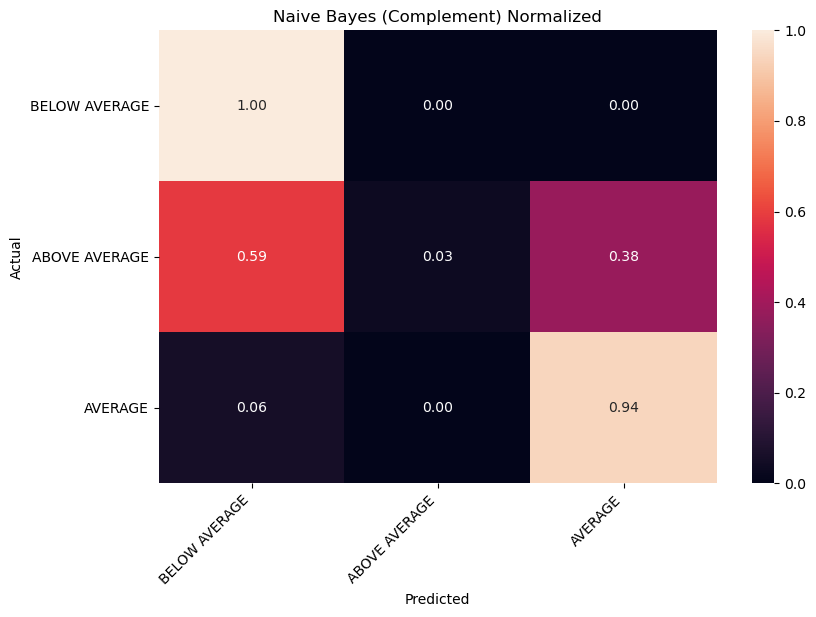

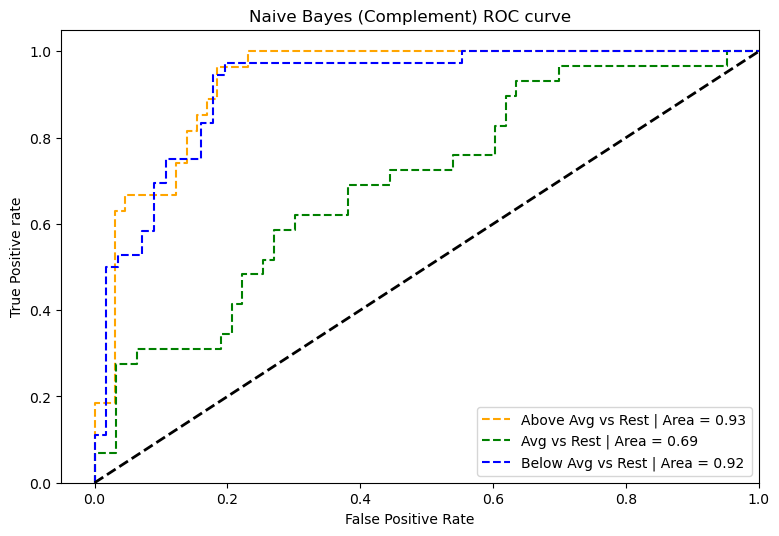

In [12]:
linearModel = ComplementNB()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
print('Model Score: ', Model_score)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes (Complement) Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes (Complement) Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Naive Bayes (Complement) ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()

Model Score:  0.6304347826086957


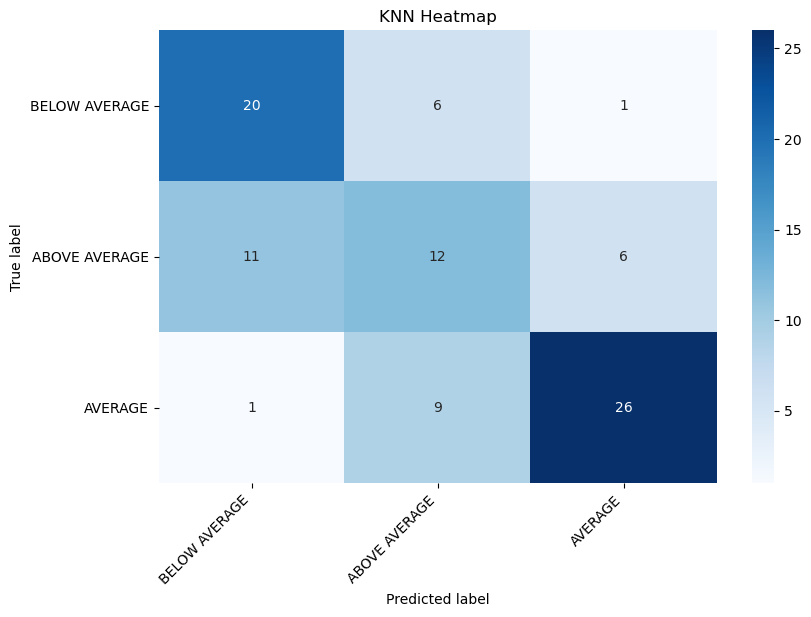

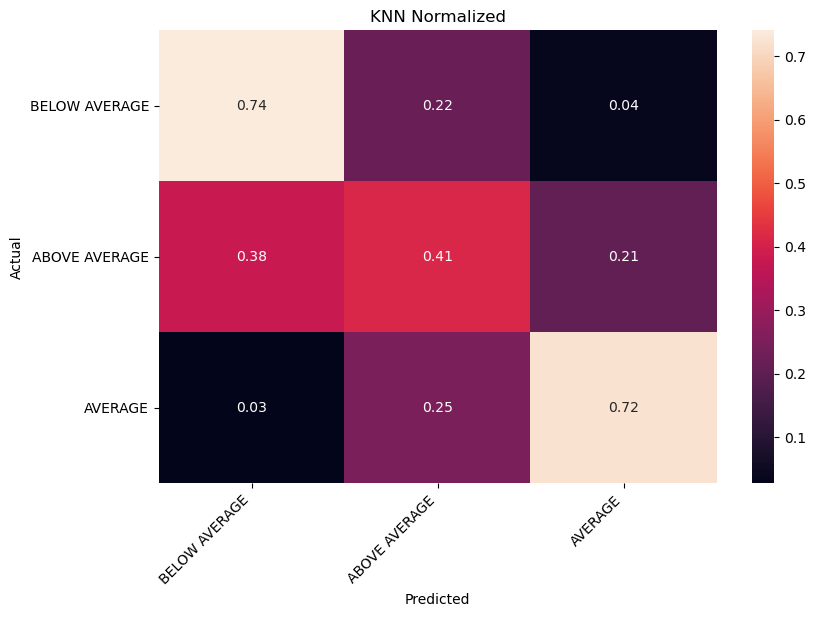

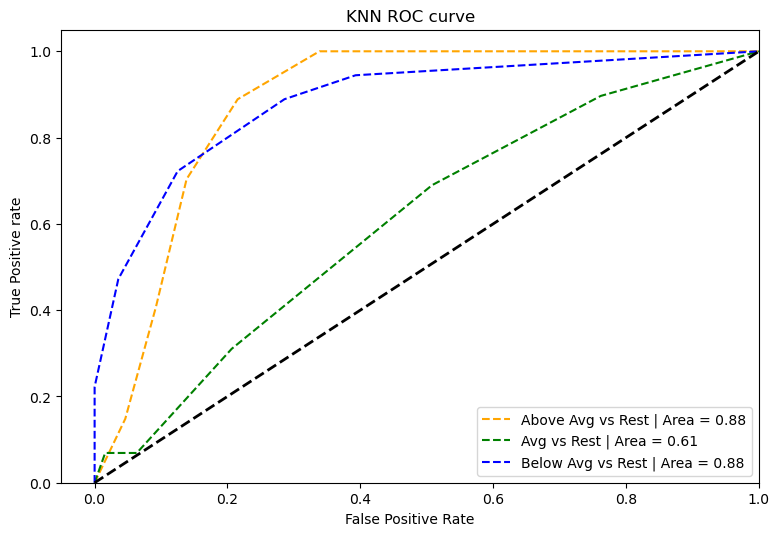

In [13]:
linearModel = KNeighborsClassifier()
linearModel.fit(x_train, y_train)
linearPredictions = linearModel.predict(x_test)

Model_score = linearModel.score(x_test,y_test)
print('Model Score: ', Model_score)

conmat = confusion_matrix(y_test, linearPredictions)
conmat_normalized = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]
val = np.mat(conmat)
valn = np.mat(conmat_normalized)
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('KNN Heatmap')
plt.show()

df_cmn = pd.DataFrame(valn, index=classnames, columns=classnames)
plt.figure(figsize=(9,6),dpi=100)
heatmapn = sns.heatmap(df_cmn, annot=True, fmt='.2f')
heatmapn.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmapn.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN Normalized')
plt.show(block=False)

y_temp_train = y_train.astype('category')
y_temp_train = y_temp_train.cat.codes
y_temp_test = y_test.astype('category')
y_temp_test = y_temp_test.cat.codes

# fit model
clf = OneVsRestClassifier(linearModel)
clf.fit(x_train, y_temp_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_temp_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotting    
plt.figure(figsize=(9,6),dpi=100)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Above Avg vs Rest | Area = '+str(round(roc_auc[0],2)))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Avg vs Rest | Area = '+str(round(roc_auc[1],2)))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Below Avg vs Rest | Area = '+str(round(roc_auc[2],2)))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.legend(loc="lower right")

# plt.show()